
Шишка Антон (Варіант 30)

In [81]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

1. Завантажте файл Housing.csv. Виведіть перші 5 рядків.

In [58]:
from google.colab import files
my_file = files.upload()

data = pd.read_csv('Housing.csv', encoding='ISO-8859-1')

print(data.head())

Saving Housing.csv to Housing (6).csv
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


2. Зробіть новий датасет, який містить тільки ці стовпчики.

In [59]:
columns = ['price', 'area', 'bedrooms', 'bathrooms']
new_data = data[columns]

3. Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних.
Зробити це  по аналогії з попередніми роботами (визначити тип даних, перевірити наявність “-“, замінити на Nan, потім змінити тип даних на float, потім на середнє значення за стовпчиком.

In [60]:
print(new_data.info())
print(new_data.isnull().sum())

new_data.replace('-', pd.NA, inplace=True)
new_data = new_data.astype(float)

new_data.fillna(new_data.mean(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB
None
price        0
area         0
bedrooms     0
bathrooms    0
dtype: int64


<ipython-input-60-11687cdfe51b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace('-', pd.NA, inplace=True)


4. Нормалізуйте дані перед подальшим використанням. Це може покращити швидкість навчання моделі та поліпшити її стабільність. Дані для лінійної регресії нормалізуються так, щоб їх середнє значення було близьким до 0, а стандартне відхилення - близьким до 1.

In [61]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)

5. Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.

In [62]:
X = scaled_data[:, 1:]
y = scaled_data[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).

In [63]:
X = normalized_data[['area', 'bedrooms', 'bathrooms']]
y = normalized_data['price']

7. Побудуйте модель лінійної регресії та навчіть її на навчальних даних.

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

8. Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка (RMSE) та коефіцієнт детермінації (R^2).

In [65]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 0.8874106823867896
R^2: 0.45592991188724463


9. Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних.

In [76]:
y_pred = model.predict(X_test)

predicted_prices = scaler.inverse_transform(pd.concat([pd.DataFrame(y_pred), pd.DataFrame(X_test)], axis=1))

print("Прогнозовані ціни на житло:", predicted_prices[:, 0])

Прогнозовані ціни на житло: [6383168.05981192 6230250.35140428 3597885.28090091 4289730.8386382
 3930445.60575177 4883933.33918115 5505773.16533075 6068793.48103629
 3321512.02483442 3495157.72744705 8731338.12527606 3561265.8244721
 3487335.97847432 3633344.35548029 3933900.2714526  6661080.95290716
 2893133.47793137 4635197.40872131 4583377.42320884 4274999.75826381
 4296640.17003986 4920207.32903988 3462807.85199841 3875170.95453847
 5412497.19140831 7425564.68389184 3269692.03932196 5021117.35611339
 7122556.7133197  3238600.04801448 5366583.9261965  3640253.68688195
 6057517.06636272 4847659.34932242 4572198.51082701 5573863.86824637
 4167435.67282878 4021179.33154445 3764621.65211187 5307730.62714319
 5319221.21748587 3456243.98716683 6202613.02579763 4013357.58257171
 4534099.68582614 4235271.10270425 6057517.06636272 4525560.52386579
 4983206.22693418 3238600.04801448 6567080.25723531 3238600.04801448
 4886475.58731091 4116997.55359665 4180093.95378268 3567705.7071645
 5971150.

**Частина 2: Знайдіть параметри аналітичним рішенням**
10. Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу для спрощеного аналітичного рішення лінійної регресії.

In [78]:
X_with_intercept = np.column_stack((np.ones(len(X)), X))

beta = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)

print("Коефіцієнти лінійної регресії (ваги моделі):")
print("Intercept:", beta[0])
print("Коефіцієнти для ознак (area, bedrooms, bathrooms):", beta[1:])

Коефіцієнти лінійної регресії (ваги моделі):
Intercept: -3.03013178123375e-16
Коефіцієнти для ознак (area, bedrooms, bathrooms): [0.43945209 0.16052866 0.37234442]


**Частина 3: Візуалізація результатів та порівняння**
11. Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю.

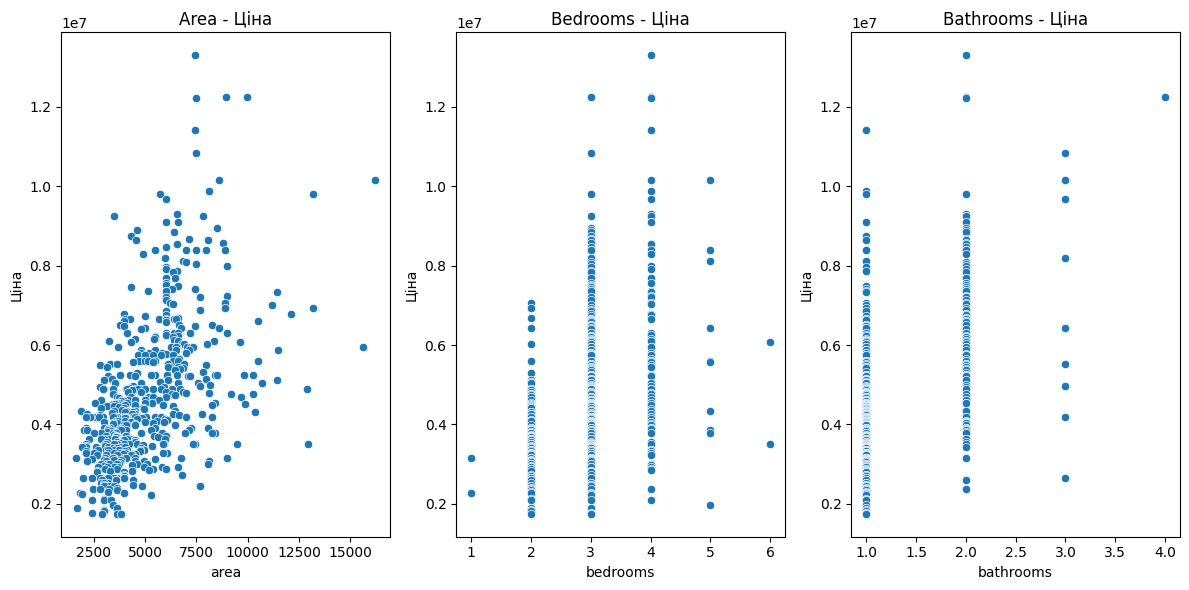

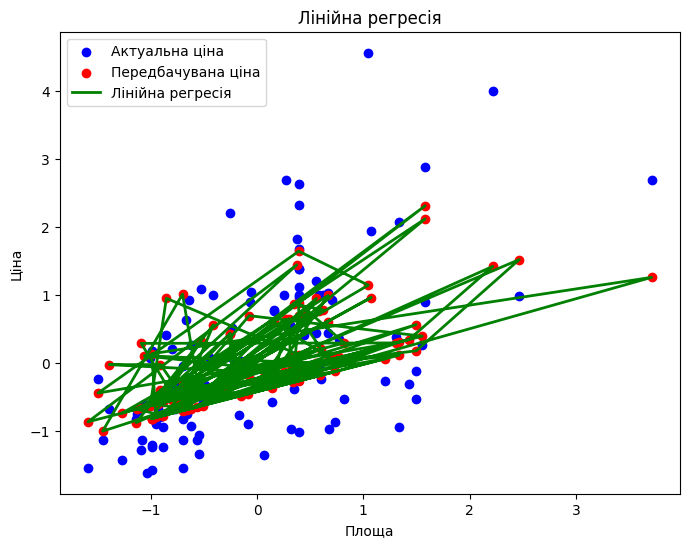

In [83]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(['area', 'bedrooms', 'bathrooms']):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=data[col], y=data['price'])
    plt.title(f'{col.capitalize()} - Ціна')
    plt.xlabel(col)
    plt.ylabel('Ціна')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

plt.scatter(X_test[:, 0], y_test, color='blue', label='Актуальна ціна')

plt.scatter(X_test[:, 0], y_pred, color='red', label='Передбачувана ціна')

plt.plot(X_test[:, 0], y_pred, color='green', linewidth=2, label='Лінійна регресія')

plt.title('Лінійна регресія')
plt.xlabel('Площа')
plt.ylabel('Ціна')
plt.legend()
plt.show()

12. Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами та оцініть, наскільки схожі вони.

In [85]:
print("Коефіцієнти лінійної регресії (ваги моделі) визначені бібліотекою:")
print("Intercept:", model.intercept_)
print("Коефіцієнти для ознак (area, bedrooms, bathrooms):", model.coef_)

print("\nКоефіцієнти лінійної регресії (ваги моделі) визначені аналітичним методом:")
print("Intercept (Аналітичний метод):", beta[0])
print("Коефіцієнти для ознак (Аналітичний метод):", beta[1:])

Коефіцієнти лінійної регресії (ваги моделі) визначені бібліотекою:
Intercept: -0.016281754425403302
Коефіцієнти для ознак (area, bedrooms, bathrooms): [0.40082084 0.14213176 0.38208794]

Коефіцієнти лінійної регресії (ваги моделі) визначені аналітичним методом:
Intercept (Аналітичний метод): -3.03013178123375e-16
Коефіцієнти для ознак (Аналітичний метод): [0.43945209 0.16052866 0.37234442]


13. Зробіть висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів та порівняння з аналітичним рішенням.

Значення коефіцієнтів, отримані аналітично та за допомогою бібліотеки, показують схожі результати, що свідчить про правильність побудованої моделі.Лінійна регресія може бути обмеженою у прогнозуванні цін на будинок, особливо якщо залежність між ознаками та цільовою змінною не є простою лінійною.
Графік фактичних та передбачених значень цін на будинок вказує на те, як добре модель відповідає даним.

**Висновки**

Лінійна регресія може бути корисною для загального виявлення тенденцій, але для точного прогнозування цін на будинок, особливо при наявності складних нелинійних взаємодій, інші складніші моделі можуть бути більш ефективними. Якщо точність прогнозів є важливою, можна розглянути використання більш складних методів машинного навчання або врахування додаткових ознак для покращення якості моделі.